<a href="https://colab.research.google.com/github/tomersk/python-applications/blob/main/compute_mean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computing mean from CDF
## Synthetic example

Sometime it may happen that you have value of a certain variable (let's say annual maximum daily rainfall) at differnt probabilities (or return period) and you need to compute the mean of it. In that case, we can integrate 1 - CDF (Cummulative Density Function) to get the mean:

$
E(X) = \int_{-\infty}^{\infty} \left( 1 - F_X (x) dx \right) 
$


We will assume some relationship of $F_X$ with $x$. Remember that minimum and maximum value of $F_X$ are 0 and 1, respectively. 

In [93]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

def func(x,a,b,n):
    y = (x**n-a**n)/(b**n-a**n)
    y[x<a] = 0
    y[x>b] = 1
    return(y)

We can look at how the $F_X$ behaves with respect to $x$. Let us take different values of $n$ and some arbitrary value of $a$ and $b$. You can try some different values.

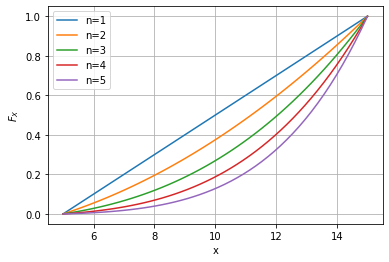

In [94]:
a,b = 5, 15
x = np.linspace(a, b)
y1 = func(x,a,b,1) # for n=1
y2 = func(x,a,b,2) # for n=2
y3 = func(x,a,b,3) # for n=3
y4 = func(x,a,b,4) # for n=4
y5 = func(x,a,b,5) # for n=5

plt.plot(x,y1, label="n=1")
plt.plot(x,y2, label="n=2")
plt.plot(x,y3, label="n=3")
plt.plot(x,y4, label="n=4")
plt.plot(x,y5, label="n=5")
plt.legend()
plt.grid(True)
plt.xlabel("x")
plt.ylabel("$F_X$")
plt.show()


You might have noticed that for any value of $a$, $b$ and $n$, CDF ($F_X$) is varying from 0 to 1 which means this function can be assumed to represent CDF.

Let us now try to compute mean by using the values of CDF. First we will look at the graphical representation of the integral of the 1-CDF.

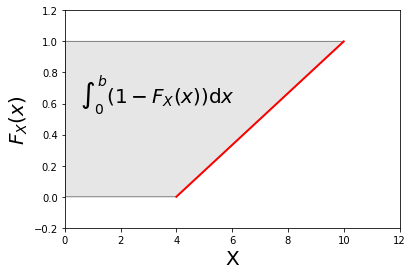

In [95]:
n = 1
a, b = 4, 10  # integral limits
x = np.linspace(a, b)
y = func(x,a,b,n)

fig, ax = plt.subplots()
ax.plot(x, y, 'r', linewidth=2)
ax.set_ylim(bottom=0)

ix = np.linspace(a, b)
iy = func(ix,a,b,n)
verts = [(a, 0), *zip(ix, iy), (b, 1), (0,1), (0,0)]
poly = Polygon(verts, facecolor='0.9', edgecolor='0.5')
ax.add_patch(poly)

ax.text(b/3, 0.6, r"$\int_0^b (1- F_X(x)) \mathrm{d}x$",
        horizontalalignment='center', fontsize=20)

plt.xlabel("X", fontsize=20)
plt.ylabel("$F_X(x)$", fontsize=20)

plt.xlim(0,b*1.2)
plt.ylim(-0.2,1.2)

plt.show()

You can see the shaded region is the integral of 1-CDF. Now we can use some numerical integration scheme (e.g. Simpson) to compute the integral and hence the mean value.

In [96]:
from scipy import integrate
x = np.linspace(a,b)

for n in range(1,10):
  F = func(x,a,b,n)
  mean_x = integrate.simpson(x, F)
  print("E(X) = %.2f for n =%i"%(mean_x,n))

E(X) = 7.00 for n =1
E(X) = 7.43 for n =2
E(X) = 7.81 for n =3
E(X) = 8.13 for n =4
E(X) = 8.39 for n =5
E(X) = 8.59 for n =6
E(X) = 8.76 for n =7
E(X) = 8.89 for n =8
E(X) = 9.00 for n =9


When $n$ is 1, it represents uniform distribution and we know that for uniform distribution mean is the average of $a$ and $b$. We are getting perfect result by doing numerical integration. We also know for higher values of $n$, mean is going to be higher relative to the value of $n=1$. 

## A real example
Sometime we are given just the value of a variable at respective return period and need to compute the mean value. Let us take some example variable and look at its behaviour through a simple plot of variable versus return period.

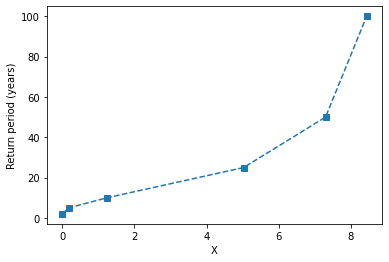

In [97]:
rp = np.array([2,5,10,25,50,100])
x = np.array([0, 0.18, 1.24, 5.03, 7.3, 8.44])

plt.plot(x,rp, '--s')
plt.xlabel("X")
plt.ylabel("Return period (years)")
plt.show()

Let us convert return period into CDF and then plot again.

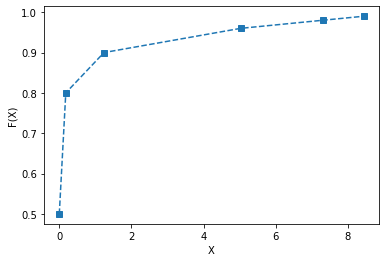

In [98]:
F = 1-1/rp

plt.plot(x,F, '--s')
plt.xlabel("X")
plt.ylabel("F(X)")
plt.show()

Let us look at the minimum and maximum value of $F$ we have:

In [99]:
print(min(F))
print(max(F))

0.5
0.99


Minimum value of a CDF should be 0, but in our data we have a minimum value of 0.5. Now we need to make some assumption of the behaviour of $x$ between CDF of 0 and 0.5. Luckily we know that our variable can not have a value of negative and at the CDF of 0.5, its value is already 0, so we can safely assume that for:

$F=0$, $x$ = 0.

We know that maximum value of CDF should be 1, but in our data, maximum value is 0.99. This is not very far from 1, but still it is not 1. If we know what is the possible physical limit of $x$, we can assume that value. We know that physically the maximum limit can be 100, so we can assume that for:

$F=1$, $x$ = 100.

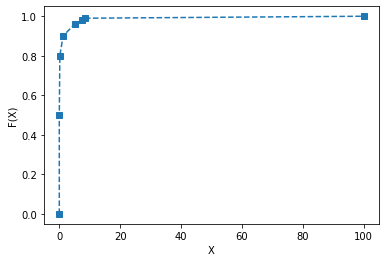

In [100]:
x = np.append(np.append(0,x),100)
F = np.append(np.append(0,F),1)

plt.plot(x,F, '--s')
plt.xlabel("X")
plt.ylabel("F(X)")
plt.show()

Now we will use Simpson method to compute the mean:

In [102]:
mean_x = integrate.simpson(x, F)
print(mean_x)

0.8420675000000004


We have made an assumption of the maximum value of $x$. Let us examine how much difference does this assumption make on the computed value of the mean of $x$. We know that maximum value should be equal to or higher than the value corresponding to return period of 100 years (in general whatever maximum return period we have). We will generate different possible values and compute mean for each of these and see how much sensitive this assumption is.

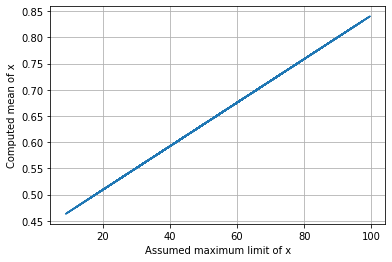

Ratio of computed mean has a variation of 1.81


In [117]:
U = np.random.uniform(size=100)
x = np.array([0, 0.18, 1.24, 5.03, 7.3, 8.44])
max_x = x[-1] + (100-x[-1])*U
mean_x = np.zeros(U.shape)

for i in range(len(U)):
  rp = np.array([2,5,10,25,50,100])
  F = 1-1/rp
  x = np.array([0, 0.18, 1.24, 5.03, 7.3, 8.44])
  
  x = np.append(np.append(0,x),max_x[i])
  F = np.append(np.append(0,F),1)
  
  mean_x[i] = integrate.simpson(x, F)

plt.plot(max_x,mean_x)
plt.xlabel("Assumed maximum limit of x")
plt.ylabel("Computed mean of x")
plt.grid(True)
plt.show()

print("Ratio of computed mean has a variation of %.2f"%(max(mean_x)/min(mean_x)))

We can see from the above plot that there is a variation of 1.8 times. So we need to be very careful in making this assumption based on the physical behaviour of this variable. That is why in data science, science matters most!